In [1]:
import numpy as np
import scipy
from activ import load_data
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from activ.data_normalization import data_normalization
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import h5py
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from PyUoI.UoINMF import UoINMF

In [2]:
rawdata = load_data(uoinmf=False)
raw_bm = rawdata.biomarkers
raw_oc = rawdata.outcomes

knum = 5
kf = StratifiedKFold(n_splits=knum)

In [61]:
bm_input = raw_bm
ks = list(range(2,20))
recon = np.zeros((len(ks), raw_bm.shape[0], raw_bm.shape[1]))

recon_err = np.zeros(len(ks))

for cv, (train_index, test_index) in enumerate(kf.split(bm_input, raw_oc[:,32])):
    train, test = bm_input[train_index], bm_input[test_index]
    train_bm = train
    test_bm = test
    for ii,k in enumerate(ks):
        nmf = NMF(n_components = k, beta_loss='kullback-leibler', solver='mu', max_iter=1000, init='random')
        W_fit = nmf.fit(train_bm)
        transform = nmf.transform(test_bm)
        inv_transform = nmf.inverse_transform(transform)
        recon[ii,test_index] = inv_transform

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [26]:
recon.shape, recon_err.shape

((18, 247, 235), (18,))

In [62]:

for ii,k in enumerate(ks):
    recon_err[ii] = np.linalg.norm(recon[ii]-raw_bm)


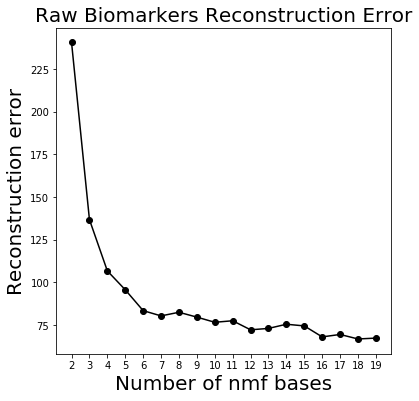

In [63]:
plt.figure(figsize=(6,6))
plt.plot(ks, recon_err, '-o', color='black')
plt.xticks(ks)
plt.xlabel('Number of nmf bases', fontsize=20)
plt.ylabel('Reconstruction error', fontsize=20)
plt.title('Raw Biomarkers Reconstruction Error', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/raw_bm_recon.pdf')

In [13]:
rawdata.outcome_features[np.where(np.min(raw_oc, axis=0) < 0)[0]]

array(['CVLTTrial1StandardScore_6mo', 'CVLTTrial2StandardScore_6mo',
       'CVLTTrial3StandardScore_6mo', 'CVLTTrial4StandardScore_6mo',
       'CVLTTrial5StandardScore_6mo', 'CVLTTrialBStandardScore_6mo',
       'CVLTShortDelayFreeRecallStandardScore_6mo',
       'CVLTShortDelayCuedRecallStandardScore_6mo',
       'CVLTLongDelayFreeRecallStandardScore_6mo',
       'CVLTLongDelayCuedRecallStandardScore_6mo',
       'CVLTFreeRecallIntrusionsStandard_6mo',
       'CVLTCuedRecallIntrusionsStandard_6mo',
       'CVLTTotalIntrusionsStandard_6mo',
       'CVLTTotalRepetitionsStandard_6mo',
       'CVLTTotalRecognitionHitsStandardScore_6mo',
       'CVLTTotalRecognitionDiscriminabilityStandardScore_6mo'],
      dtype='<U53')

In [42]:
# scale outcomes 
scaler = MinMaxScaler()
transformed_raw_oc = scaler.fit_transform(raw_oc)
transformed_raw_oc.shape

(247, 177)

In [67]:
transformed_raw_oc = raw_oc - np.min(raw_oc, axis=0)

In [57]:

ks = list(range(2,40))
recon_oc = np.zeros((len(ks), transformed_raw_oc.shape[0], transformed_raw_oc.shape[1]))

recon_err_oc = np.zeros(len(ks))

for cv, (train_index, test_index) in enumerate(kf.split(transformed_raw_oc, raw_oc[:,32])):
    train, test = transformed_raw_oc[train_index], transformed_raw_oc[test_index]
    train_oc = train
    test_oc = test
    for ii,k in enumerate(ks):
        nmf = NMF(n_components = k, beta_loss='kullback-leibler', solver='mu', max_iter=1000, init='random')
        W_fit = nmf.fit(train_oc)
        transform = nmf.transform(test_oc)
        inv_transform = nmf.inverse_transform(transform)
        recon_oc[ii,test_index] = inv_transform
        
div = np.linalg.norm(transformed_raw_oc)
for ii,k in enumerate(ks):
    recon_err_oc[ii] = np.linalg.norm(recon_oc[ii]-transformed_raw_oc)/div

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Text(0.5, 1.0, 'Raw Outcomes Reconstruction Error')

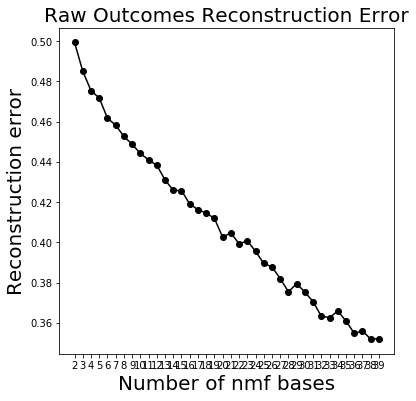

In [58]:
plt.figure(figsize=(6,6))
plt.plot(ks, recon_err_oc, '-o', color='black')
plt.xticks(ks)
plt.xlabel('Number of nmf bases', fontsize=20)
plt.ylabel('Reconstruction error', fontsize=20)
plt.title('Raw Outcomes Reconstruction Error', fontsize=20)

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Text(0.5, 1.0, 'Raw Outcomes Reconstruction Error')

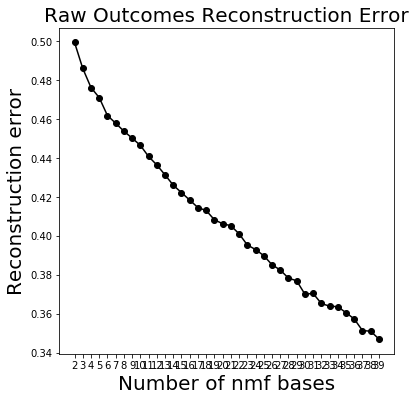

In [59]:
# scale outcomes 
scaler = MinMaxScaler()
transformed_raw_oc = scaler.fit_transform(raw_oc)
transformed_raw_oc.shape

ks = list(range(2,40))
recon_oc = np.zeros((len(ks), transformed_raw_oc.shape[0], transformed_raw_oc.shape[1]))

recon_err_oc = np.zeros(len(ks))

for cv, (train_index, test_index) in enumerate(kf.split(transformed_raw_oc, raw_oc[:,32])):
    train, test = transformed_raw_oc[train_index], transformed_raw_oc[test_index]
    train_oc = train
    test_oc = test
    for ii,k in enumerate(ks):
        nmf = NMF(n_components = k, beta_loss='kullback-leibler', solver='mu', max_iter=1000, init='random')
        W_fit = nmf.fit(train_oc)
        transform = nmf.transform(test_oc)
        inv_transform = nmf.inverse_transform(transform)
        recon_oc[ii,test_index] = inv_transform
        
div = np.linalg.norm(transformed_raw_oc)
for ii,k in enumerate(ks):
    recon_err_oc[ii] = np.linalg.norm(recon_oc[ii]-transformed_raw_oc)/div

plt.figure(figsize=(6,6))
plt.plot(ks, recon_err_oc, '-o', color='black')
plt.xticks(ks)
plt.xlabel('Number of nmf bases', fontsize=20)
plt.ylabel('Reconstruction error', fontsize=20)
plt.title('Raw Outcomes Reconstruction Error', fontsize=20)

In [5]:
# uoinmf on outcomes

transformed_raw_oc = raw_oc - np.min(raw_oc, axis=0)
oc_input = transformed_raw_oc


eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
minsamples = np.arange(20,80,5)
kf = StratifiedKFold(n_splits=5)

In [ ]:
minsamples

In [ ]:
error_mat = np.zeros((len(eps),len(minsamples),5))
k_mat = np.zeros((len(eps), len(minsamples), 5))
for cv, (train_index, test_index) in enumerate(kf.split(oc_input, raw_oc[:,32])):
    train, test = oc_input[train_index], oc_input[test_index]
    train_oc = train
    test_oc = test
    print('eps {} minsamples {}'.format(e,m))
    for ii,e in enumerate(eps):
        for jj,m in enumerate(minsamples):
            db = DBSCAN(eps=e, min_samples=m)
            uoinmf = UoINMF(ranks=list(range(2,20)),dbscan=db)
            decomp = uoinmf.fit(train_oc)
            H = decomp.components_
            W = decomp.transform(test_oc, reconstruction_err=True)
            error = np.linalg.norm(test_oc-W@H)
            error_mat[ii,jj,cv] = error
            k_mat[ii,jj,cv] = H.shape[0]

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


eps 0.2 minsamples 25


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macos

eps 0.8 minsamples 75


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
